<a href="https://colab.research.google.com/github/tohnperfect/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

### Generate Data 

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

### Explore data

In [3]:
X.shape

(500, 2)

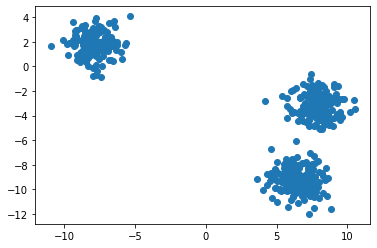

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

### Clustering

#### Import

In [5]:
from sklearn.cluster import KMeans

#### Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [10]:
y_clust = kmeans.fit_predict(X)

In [11]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

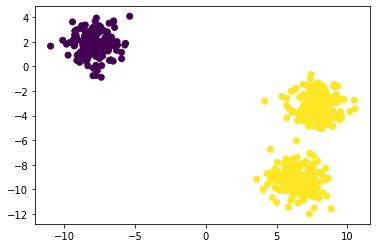

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

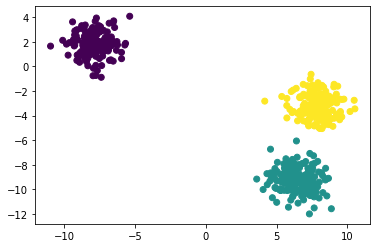

In [13]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

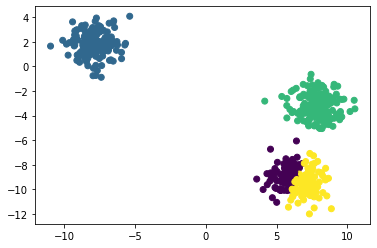

In [14]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

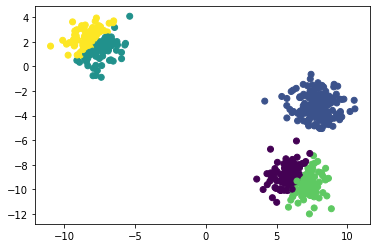

In [34]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

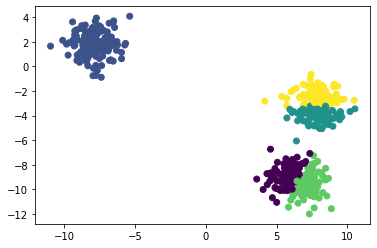

In [35]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization)

In [36]:
import cv2
import os

In [37]:
img = cv2.imread('/content/depositphotos_37554769-stock-illustration-beaver.jpg')

In [39]:
img.shape

(847, 1024, 3)

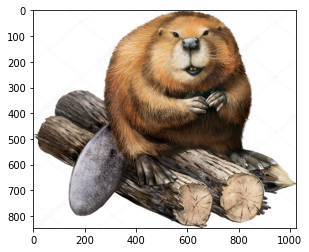

In [40]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [41]:
import numpy as np

In [43]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(82888, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [44]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [45]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(867328, 3)

In [46]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [47]:
centroid = myquantize.cluster_centers_

In [48]:
centroid

array([[254.44239561, 254.40505081, 254.28638876],
       [ 86.0579675 ,  75.9628372 ,  68.53787695],
       [223.11838622, 195.31390946, 163.37248266],
       [ 49.35119108,  35.28023449,  23.9016299 ],
       [138.96520665, 125.89922934, 115.48769226],
       [167.38955394, 151.39346619, 137.97880024],
       [204.05452872, 152.09298208,  98.02457333],
       [ 24.81491694,  16.44536106,   9.20427167],
       [109.10068456,  72.83876537,  45.19325135],
       [140.63670952,  97.74772176,  62.72713326],
       [ 71.40006373,  53.68082787,  40.17134327],
       [213.10092452, 174.89844577, 133.27048688],
       [184.80082725, 177.22554745, 177.37119221],
       [111.48543125, 100.40761916,  91.80606598],
       [226.58109155, 213.50287834, 197.77792538],
       [173.11964335, 124.50836328,  79.34545203]])

แทนสีคืนลงไป

In [49]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

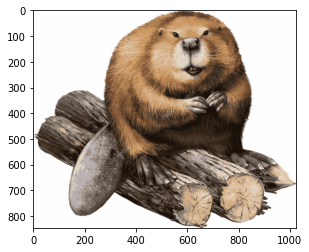

In [50]:
plt.imshow(new_img/255)

In [54]:
plt.imsave('img.jpg',new_img/255)

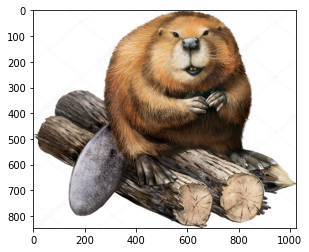

In [51]:
plt.imshow(RGB_img)

# Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation